---
<span style="color:blue">[Introduction and Data Preparation](https://wfseaton.github.io/TheDigitalFrontier/Intro%20&%20data%20prep.html)</span>
---
<span style="color:blue">[Exploratory Data Analysis](https://wfseaton.github.io/TheDigitalFrontier/EDA.html)</span>
---
<span style="color:blue">[Dimensionality Reduction](https://wfseaton.github.io/TheDigitalFrontier/3.%20Dimensionality%20Reduction.html)</span>
---
<span style="color:blue">[Clustering Techniques](https://wfseaton.github.io/TheDigitalFrontier/clustering.html)</span>
---
<span style="color:blue">[Playlist Generation](https://wfseaton.github.io/TheDigitalFrontier/playlist_generation.html)</span>
---
<span style="color:blue">[Conclusion](https://wfseaton.github.io/TheDigitalFrontier/conclusion.html)</span>

In [1]:
import time
import math
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from os import listdir
from os.path import isfile, join
sns.set()

from itertools import chain

In [ ]:
songs = pd.read_pickle('../../data/200_first_playlists/master200.pkl')
playlists = pd.read_pickle('../../data/200_first_playlists/playlists_song_ids_200.pkl')

In [6]:
songs.columns

Index(['artist_name', 'artist_uri', 'track_name', 'album_uri', 'duration_ms',
       'album_name', 'count', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'artist_genres',
       'artist_popularity', 'album_genres', 'album_popularity',
       'album_release_date'],
      dtype='object')

## Histograms

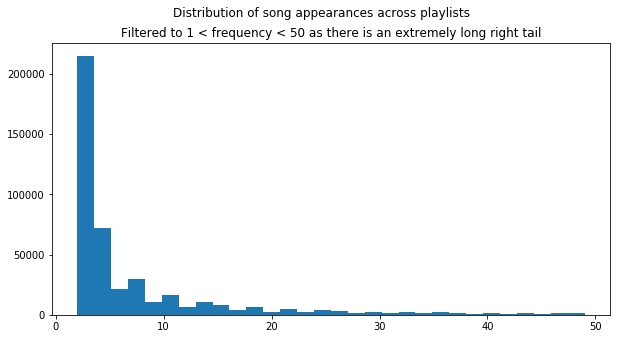

In [122]:
# Distribution of song appearances across playlists
plt.subplots(figsize=(10,5))
plt.hist(songs.loc[(songs['count'] > 1) & (songs['count'] < 50), 'count'], bins = 30)
plt.suptitle('Distribution of song appearances across playlists')
plt.title('Filtered to 1 < frequency < 50 as there is an extremely long right tail');

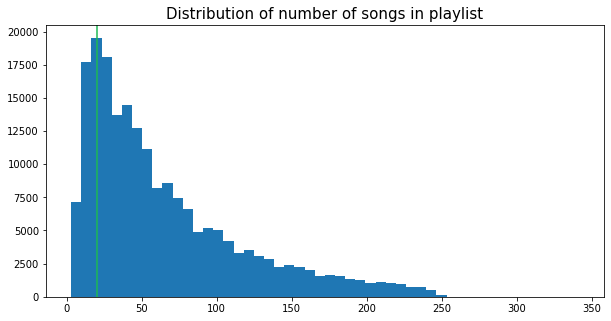

In [126]:
# Distribution of number of songs in playlist
plt.subplots(figsize=(10,5))
playlist_lengths = np.array([len(p) for p in playlists.values], 'int')
plt.hist(playlist_lengths, bins = 50)
plt.axvline(x=20, color="#1DB954")
plt.title('Distribution of number of songs in playlist', size=15);

Time elapsed: 3.9 seconds


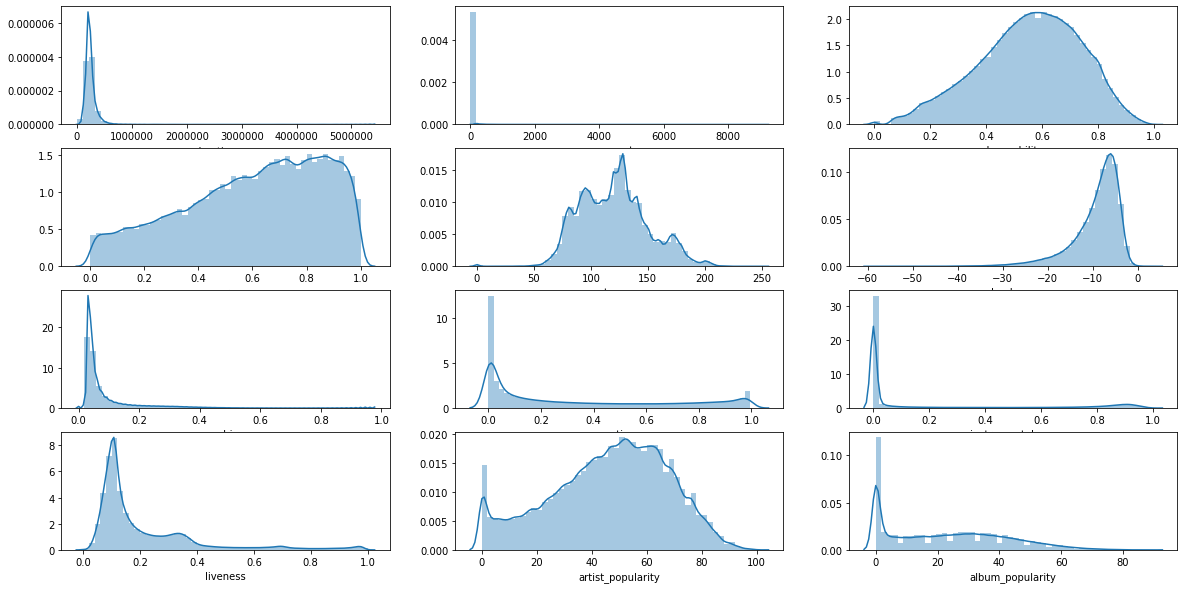

In [162]:
# Chart a number of histograms related to track features
start_time = time.time()
fig, ax = plt.subplots(4,3, figsize=(20,10))
columns = ["duration_ms", "count", "danceability", "energy", "tempo", "loudness",
                "speechiness", "acousticness", "instrumentalness", "liveness",
                "artist_popularity", "album_popularity"] #"valence", "key"
col_iter = iter(columns)
for row in range(4):
    for col in range(3):
        sns.distplot(songs[next(col_iter)], ax=ax[row,col])
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

## Pairwise associations

Time elapsed: 275.631 seconds


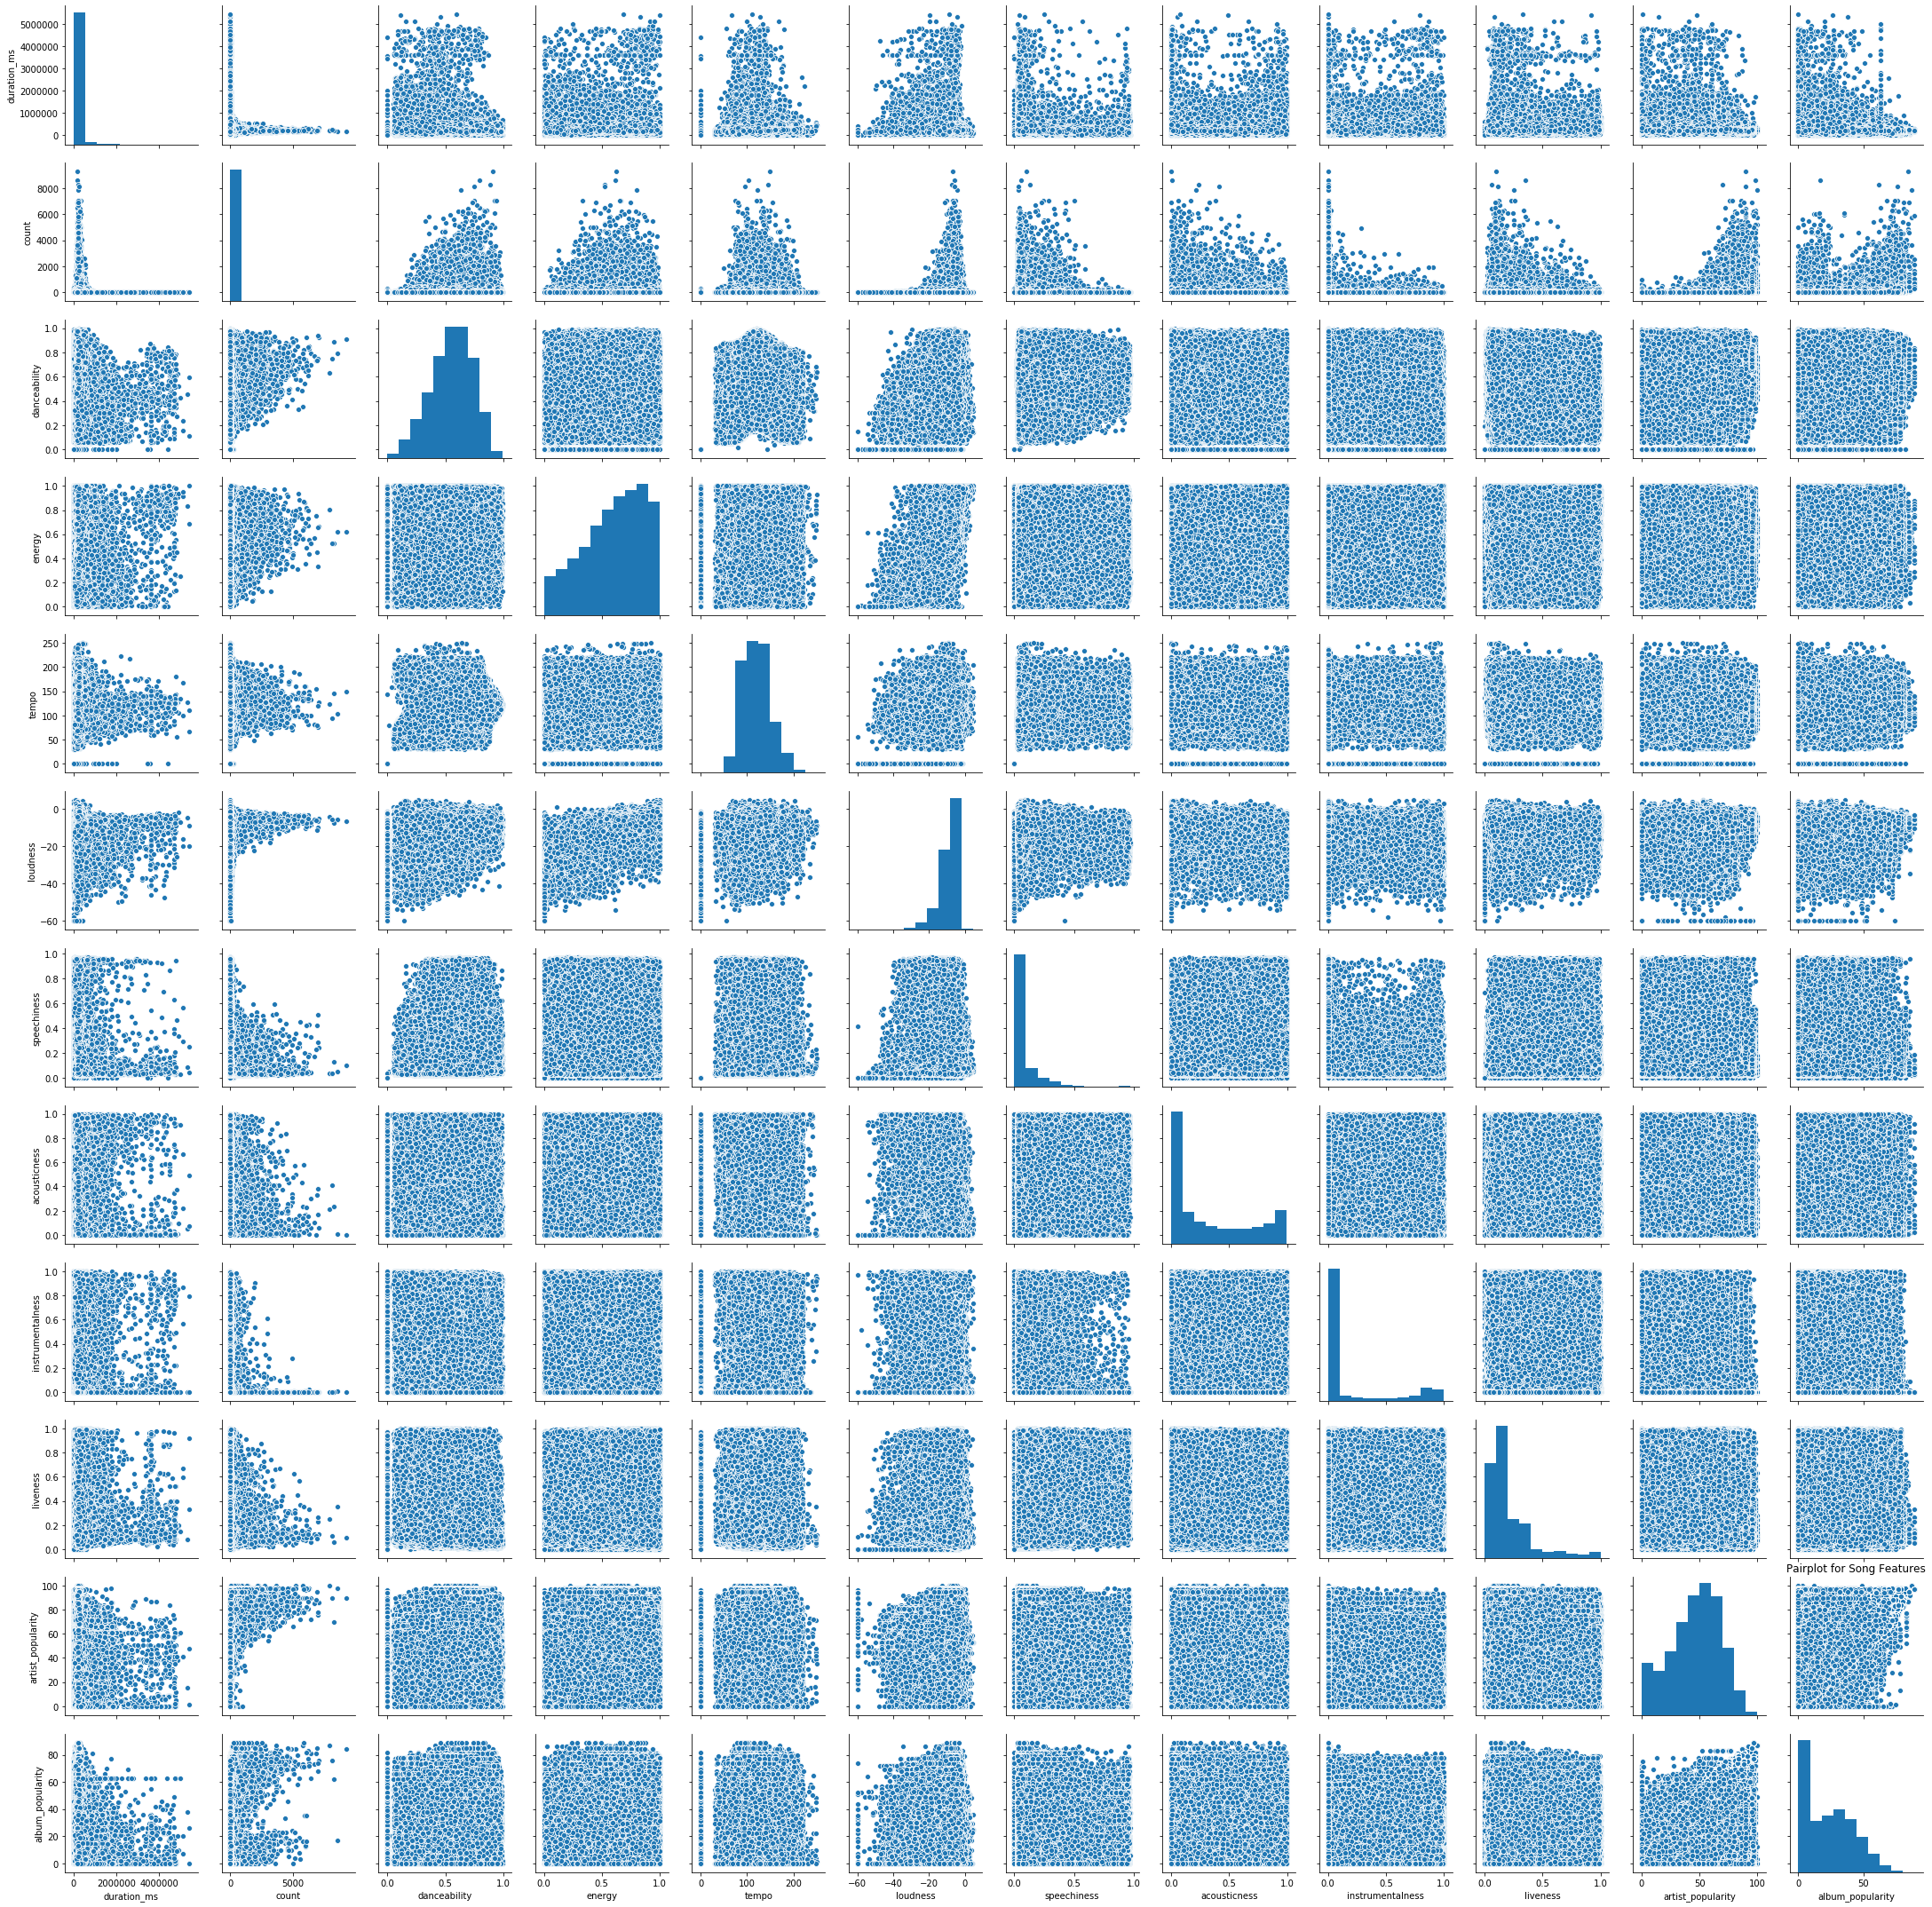

In [163]:
# Takes about 20 minutes so only uncomment and run intentionally
# Charts pairplot for all features against each other to identify colinear relationships
start_time = time.time()
to_plot = ["duration_ms", "count", "danceability", "energy", "tempo", "loudness",
                "speechiness", "acousticness", "instrumentalness", "liveness",
                "artist_popularity", "album_popularity"] #"valence", "key"
df_to_plot = songs.loc[:,to_plot]
# sns.pairplot(df_to_plot);
plt.title("Pairplot for Song Features")
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 561.528 seconds


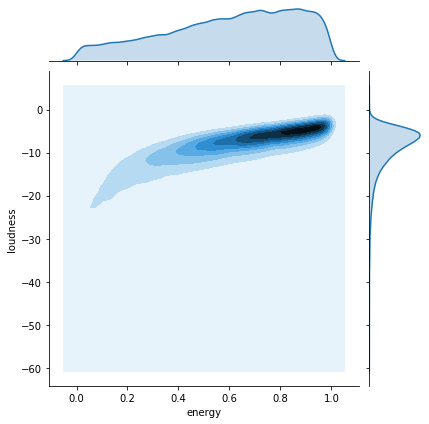

In [149]:
# Takes about 10 minutes so only uncomment and run intentionally
# Distribution plot of loudness vs energy
start_time = time.time()
# sns.jointplot(x="energy", y="loudness", data=songs, kind="kde");
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 817.11 seconds


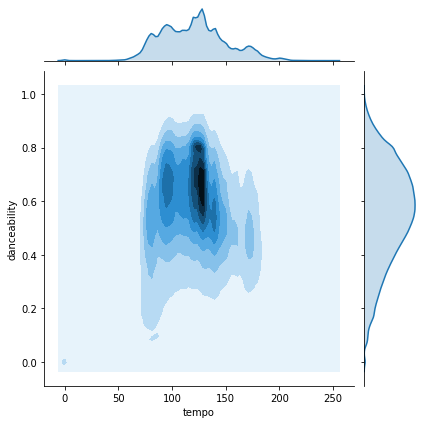

In [150]:
# Takes about 10 minutes so only uncomment and run intentionally
# Distribution plot of danceability vs tempo
start_time = time.time()
# sns.jointplot(x="tempo", y="danceability", data=songs, kind="kde");
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.337 seconds


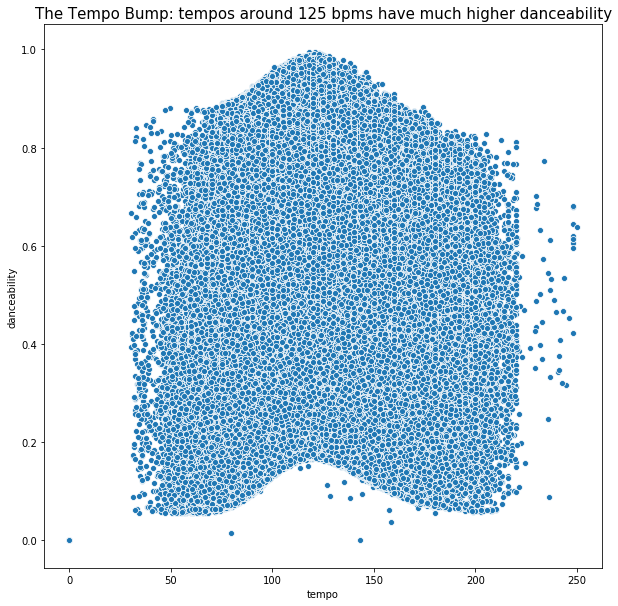

In [34]:
# Explores danceability by tempo
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="tempo", y="danceability", data=songs); # The sweet spot of danceability
plt.title("The Tempo Bump: tempos around 125 bpms have much higher danceability", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

## How are song features associated with playlist inclusion?

Time elapsed: 1.953 seconds


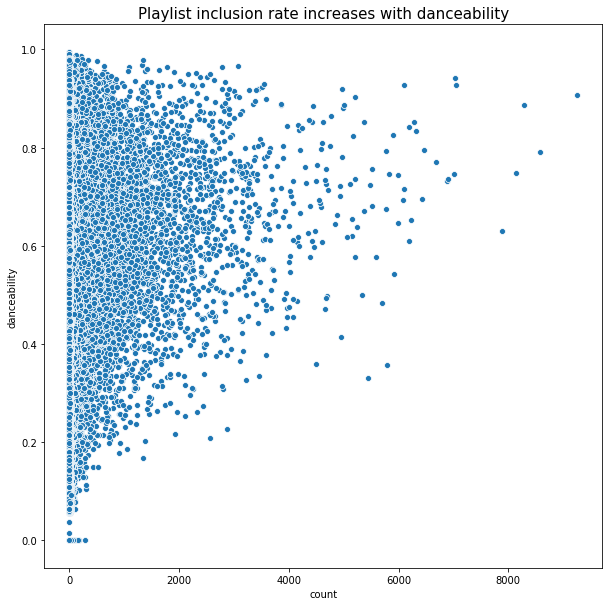

In [29]:
# Explores playlist inclusion by danceability
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="danceability", data=songs)
plt.title("Playlist inclusion rate increases with danceability", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 1.95 seconds


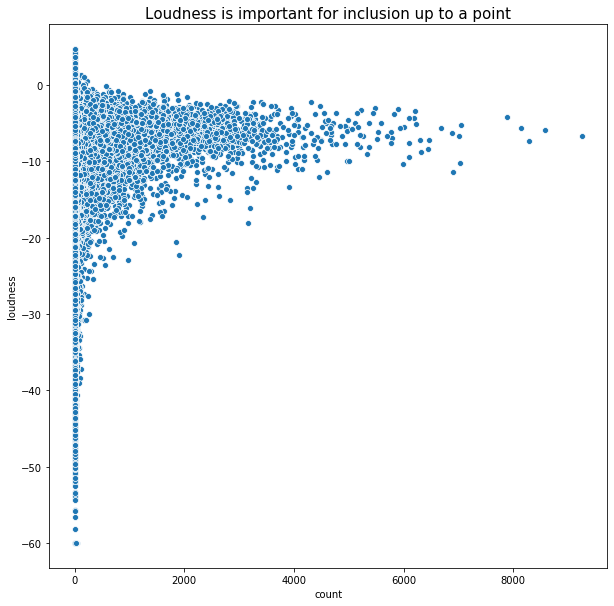

In [30]:
# Explores playlist inclusion by loudness
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="loudness", data=songs);
plt.title("Loudness is important for inclusion up to a point", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 1.954 seconds


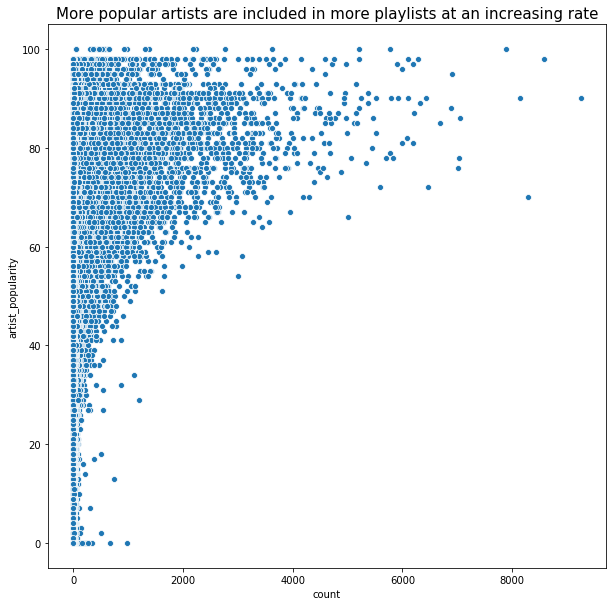

In [31]:
# Explores playlist inclusion by artist popularity
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="artist_popularity", data=songs);
plt.title("More popular artists are included in more playlists at an increasing rate", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 1.973 seconds


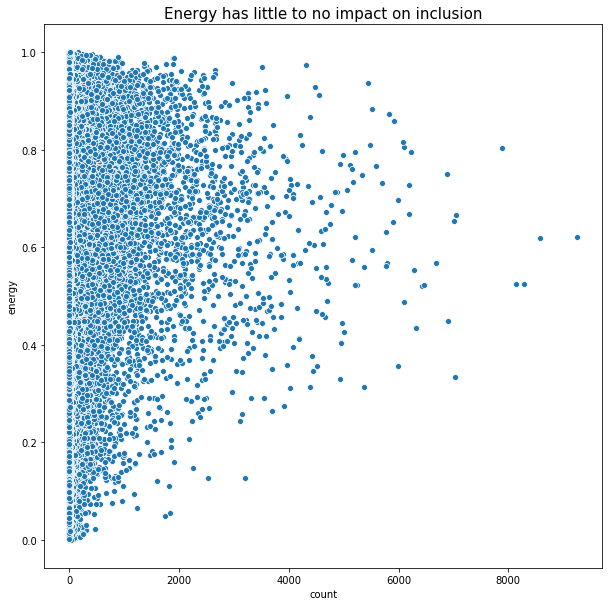

In [32]:
# Explores playlist inclusion by energy
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="energy", data=songs);
plt.title("Energy has little to no impact on inclusion", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 1.935 seconds


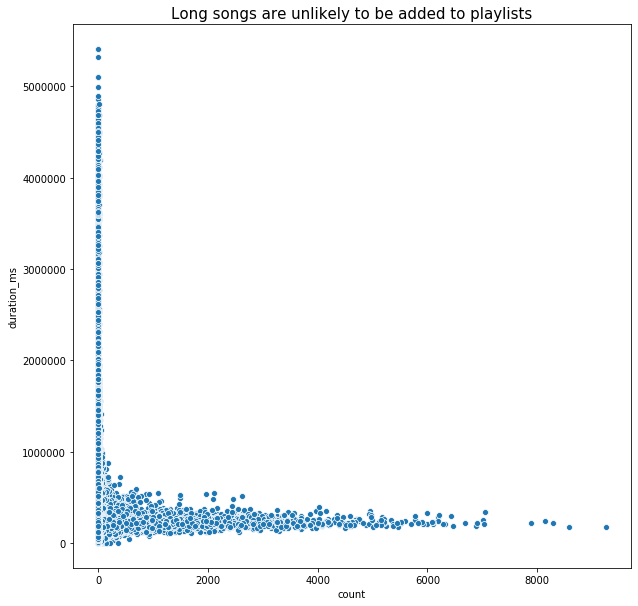

In [153]:
# Explores playlist inclusion by song duration
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="duration_ms", data=songs);
# plt.axhline(y=350000, color="#1DB954", linestyle='-')
plt.title("Long songs are unlikely to be added to playlists", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 5.503 seconds


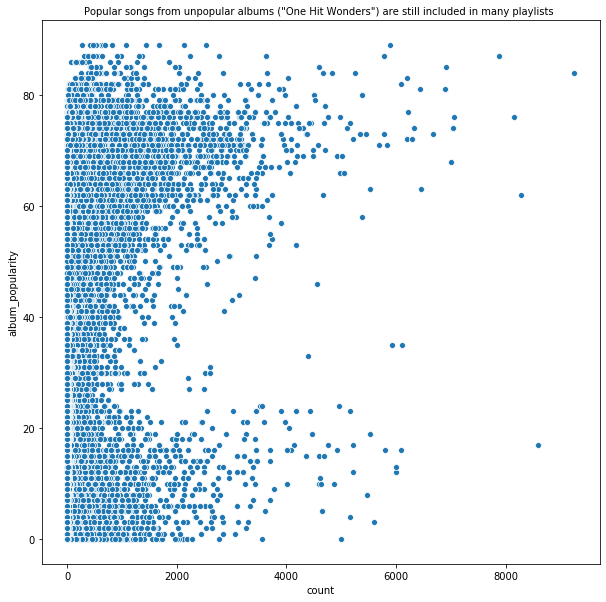

In [164]:
# Explores playlist inclusion by album popularity
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="album_popularity", data=songs);
plt.title("Popular songs from unpopular albums (\"One Hit Wonders\") are still included in many playlists ", size=10)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

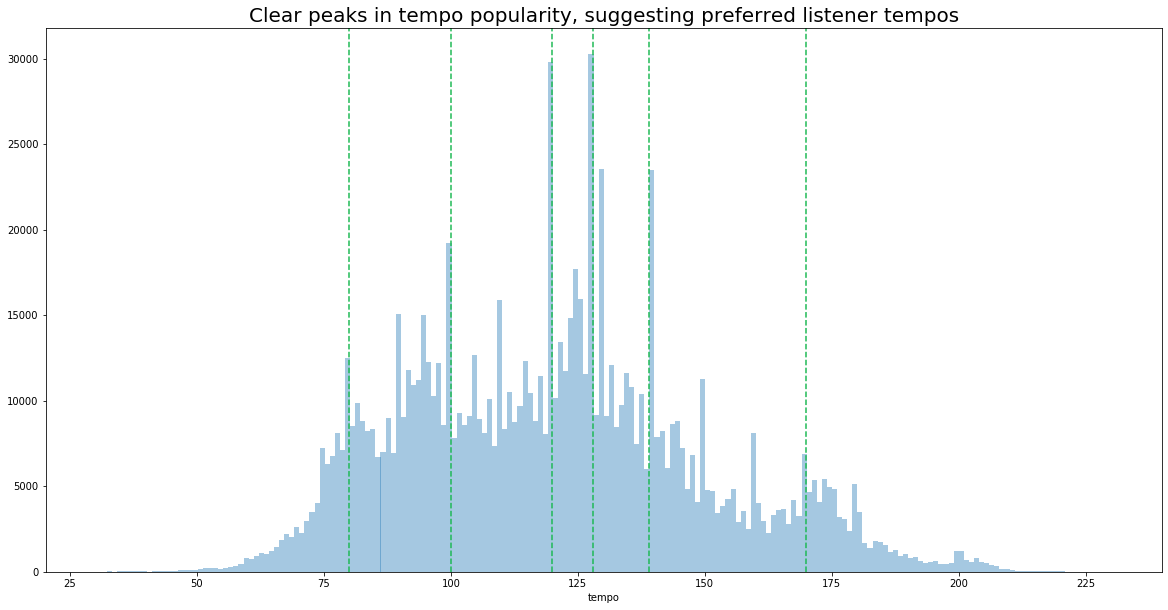

In [4]:
# Explores playlist inclusion by tempo excluding significant outliers
# Highlights peak tempo points of notable popularity
plt.subplots(figsize=(20,10))
sns.distplot(songs[(songs.tempo > 30)&(songs.tempo < 230)].tempo, kde=False, bins=200)
plt.axvline(x=80, color="#1DB954", ls="--")
plt.axvline(x=100, color="#1DB954", ls="--")
plt.axvline(x=120, color="#1DB954", ls="--")
plt.axvline(x=128, color="#1DB954", ls="--")
plt.axvline(x=139, color="#1DB954", ls="--")
plt.axvline(x=170, color="#1DB954", ls="--")
plt.title("Clear peaks in tempo popularity, suggesting preferred listener tempos", size=20);

In [5]:
# Derive new release_year column
start_time = time.time()
songs['release_year'] = songs.apply(lambda row: row['album_release_date'][0:4], axis=1)
print(songs['release_year'][0:5])
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

song_id
0         1993
159583    1993
271702    1993
445190    1993
626275    1993
Name: release_year, dtype: object
Time elapsed: 10.914 seconds


In [ ]:
# Filter to years with sufficient observations
century_songs = songs[(songs.release_year.astype(int) > 1950) & (songs.release_year.astype(int) < 2017)]

Time elapsed: 0.411 seconds


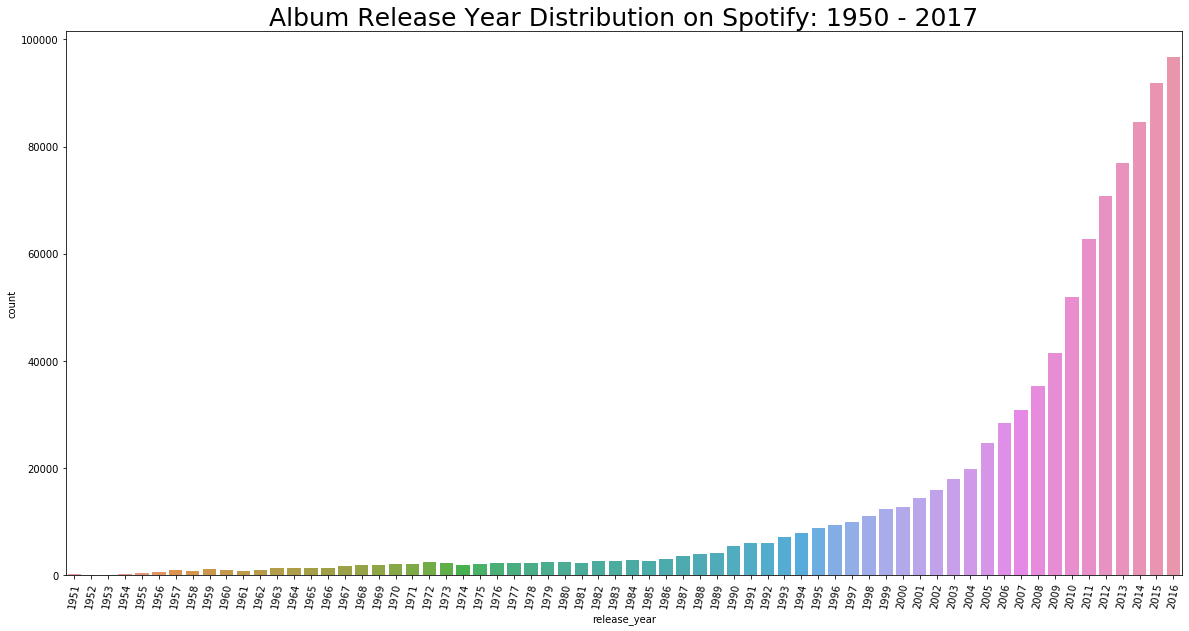

In [145]:
# Chart album_release_year distribution to understand when songs were made
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="release_year", data=century_songs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_title("Album Release Year Distribution on Spotify: 1950 - 2017", size=25)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

In [ ]:
# Scale loudness and tempo to allow plotting on some chart as others
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
century_songs['loudness_scaled'] = sc.fit_transform(np.array(century_songs['loudness']).reshape(-1,1))
display(century_songs['loudness_scaled'][0:5])
century_songs['tempo_scaled'] = sc.fit_transform(np.array(century_songs['tempo']).reshape(-1,1))
display(century_songs['tempo_scaled'][0:5])

Time elapsed: 119.136 seconds


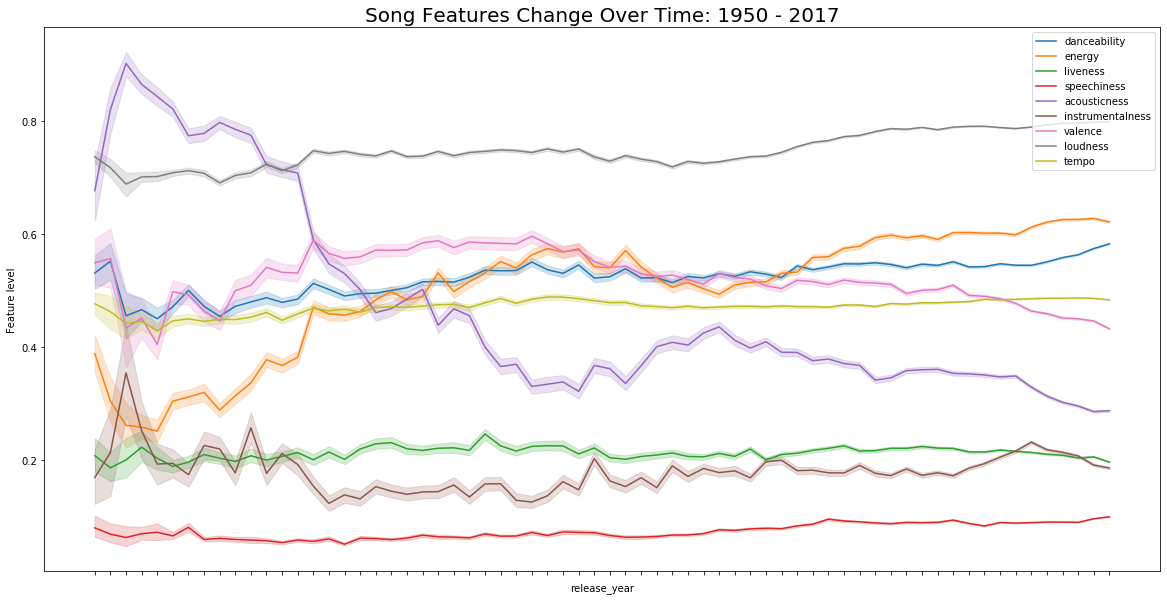

In [148]:
# Chart all track features over time
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="danceability", data=century_songs, label="danceability")
sns.lineplot(x="release_year", y="energy", data=century_songs, label="energy")
sns.lineplot(x="release_year", y="liveness", data=century_songs, label="liveness")
sns.lineplot(x="release_year", y="speechiness", data=century_songs, label="speechiness")
sns.lineplot(x="release_year", y="acousticness", data=century_songs, label="acousticness")
sns.lineplot(x="release_year", y="instrumentalness", data=century_songs, label="instrumentalness")
sns.lineplot(x="release_year", y="valence", data=century_songs, label="valence")
sns.lineplot(x="release_year", y="loudness_scaled", data=century_songs, label="loudness")
sns.lineplot(x="release_year", y="tempo_scaled", data=century_songs, label="tempo")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Song Features Change Over Time: 1950 - 2017", size=20);
ax.set_ylabel("Feature level")
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 17.608 seconds


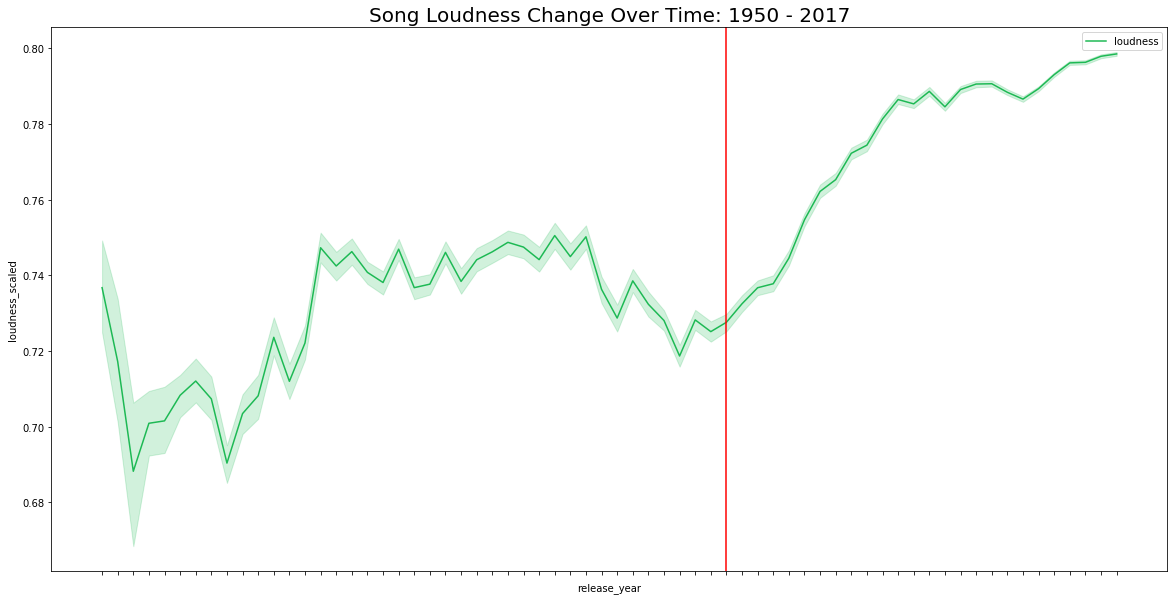

In [174]:
# Focus on loudness changes over time
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="loudness_scaled", data=century_songs, label="loudness", color="#1DB954")
plt.axvline(x=40, color="red")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_title("Song Loudness Change Over Time: 1950 - 2017", size=20);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 17.19 seconds


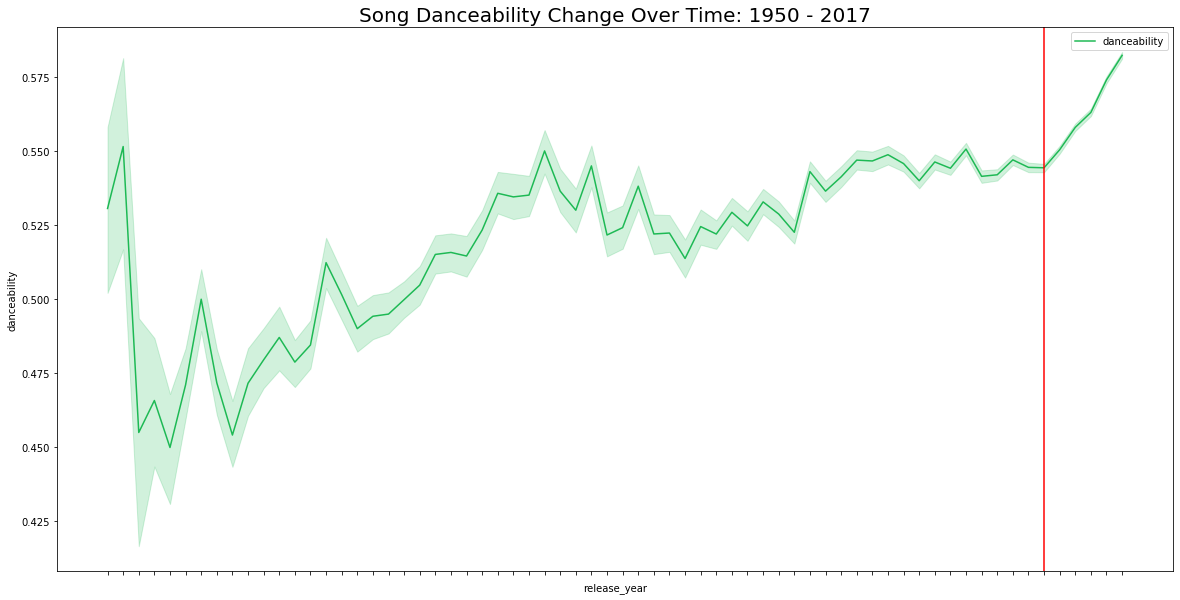

In [175]:
# Focus on danceability changes over time
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="danceability", data=century_songs, label="danceability", color="#1DB954")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.axvline(x=60, color="red")
ax.set_title("Song Danceability Change Over Time: 1950 - 2017", size=20);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

999950 100
Time elapsed: 0.528 seconds


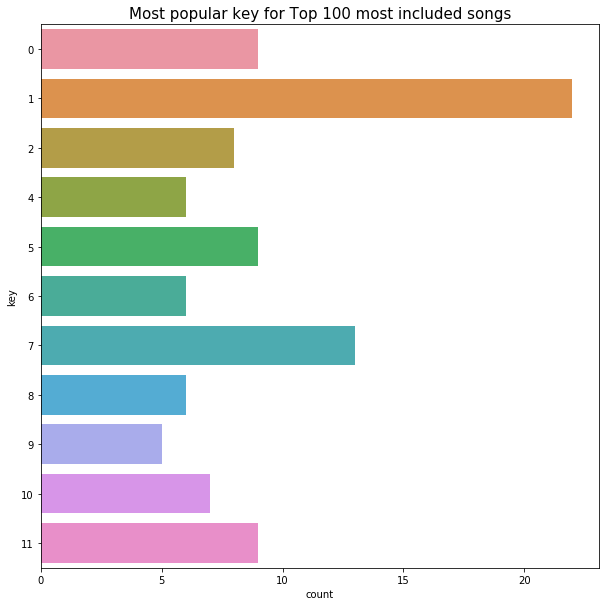

In [6]:
# Investigate musical keys of most popular songs
start_time = time.time()
preferred_artists = songs[songs['count'] > 4050]
print(len(songs), len(preferred_artists))
plt.subplots(figsize=(10,10))
sns.countplot(y="key", data=preferred_artists);
plt.title("Most popular key for Top 100 most included songs", size=15)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

In [58]:
# Preview of top playlist genres
songs['artist_genres'].value_counts()[0:10]

[]                                                                            175993
['sleep']                                                                       3401
['gospel']                                                                      2128
['classical', 'classical era', 'early romantic era']                            2014
['contemporary country', 'country', 'country road', 'modern country rock']      1954
['classical', 'classical era']                                                  1920
['ccm', 'christian alternative rock', 'christian music', 'worship']             1847
['baroque', 'classical', 'early music', 'german baroque']                       1766
['soundtrack']                                                                  1765
['banda', 'grupera', 'norteno', 'regional mexican']                             1727
Name: artist_genres, dtype: int64

In [59]:
# Calculates length of longest and shortest playlists
playlist_lengths = [len(playlist) for playlist in playlists]
print("Largest playlist", max(playlist_lengths))
print("Smallest playlist: ", min(playlist_lengths))

Largest playlist 341
Smallest playlist:  3
